(observations-doc)=

# Observations

In this tutorial, we introduce $\mathrm{LiMe}$ observations. Before measuring a line, you must declare an observation that contains the spectrum of the astronomical object. $\mathrm{LiMe}$ provides three observation types:

* $\tt{Spectrum}$: Suitable for long-slit observations. Both the spectral dispersion axis (e.g., wavelength in angstroms) and the energy density axis (e.g., flux in MJy) are one-dimensional.
* $\tt{Cube}$: Suitable for integral field spectrograph observations. In these datasets, the spectral dispersion axis is one-dimensional, while the energy density is three-dimensional.
* $\tt{Sample}$: A container for multiple $\tt{lime.Spectrum}$ or $\tt{lime.Cube}$ objects. The class functions do not load the data until an object is explicitly requested, making it suitable for platforms with limited computational resources.

<div class="alert alert-success" role="alert">

**Remember:** $LiMe$ can create these observations directly [from supported **.fits** files](../2_guides/0_creating_observations.ipynb), a [text file](../2_guides/0_creating_observations.ipynb) or by providing [the scientific data directly](../2_guides/0_creating_observations.ipynb).

</div>

## Observations design

<img src="../0_resources/images/LiMe_structure.png" alt="LiMe structure" title="LiMe structure"/>


The figure above illustrates the composite design of $\mathrm{LiMe}$: observations use instances of other classes to organize the available operations. 

This modular approach is similar to that of [IRAF (see Tody 1986)](https://ui.adsabs.harvard.edu/abs/1986SPIE..627..733T/abstract). For example:
- The $\tt{.fit}$ module contains the measurement functions.
- The $\tt{.retrieve}$ module contains the functions that extract or calculate standard variables or parameters from the spectral data.
- The $\tt{.infer}$ module contains the functions that provide more subjective estimates or quantities that can vary depending on the object under study.
- The $\tt{.plot}$ module contains the matplotlib display functions.
- The $\tt{.bokeh}$ module contains the bokeh display functions.
- The $\tt{.check}$ module contains the interactive (matplotlib) plotting functions.

For example, if we load an observation from the [examples/0_resources/spectra folder](https://github.com/Vital-Fernandez/lime/tree/master/examples/0_resources/spectra):



In [1]:
import lime
from pathlib import Path    


# Locate the data
data_folder = Path('../0_resources/spectra')
sloan_SHOC579 = data_folder/'sdss_dr18_0358-51818-0504.fits'

# Create a spectrum observation
spec = lime.Spectrum.from_file(sloan_SHOC579, instrument='sdss', redshift=0.0479)

We can plot the spectrum using the $\tt{.spectrum}$ function in the $\tt{.plot}$ module: 

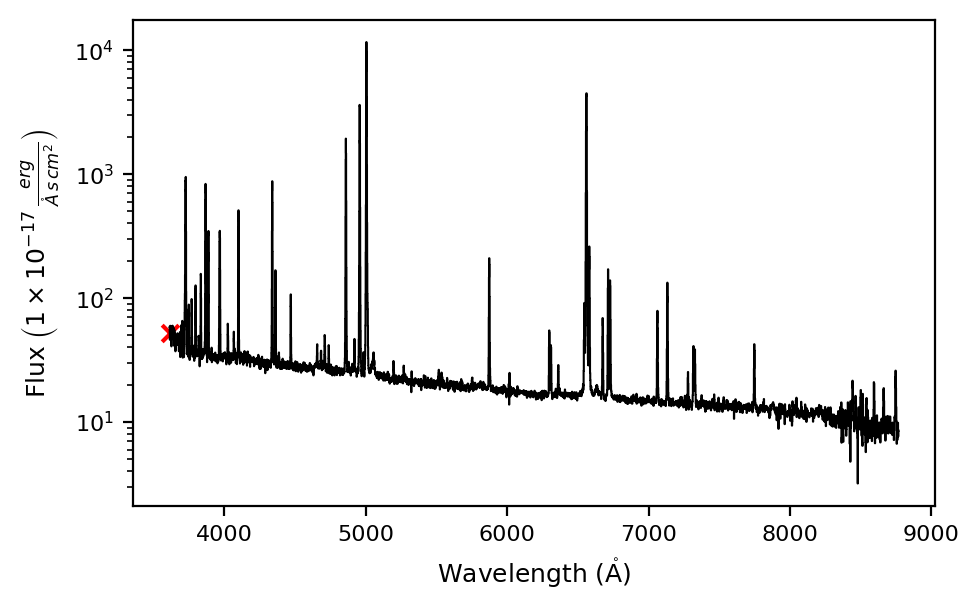

In [2]:
spec.plot.spectrum(log_scale=True, rest_frame=True)

Similarly we can plot a line using  $\tt{.bands}$ function in the same module: 

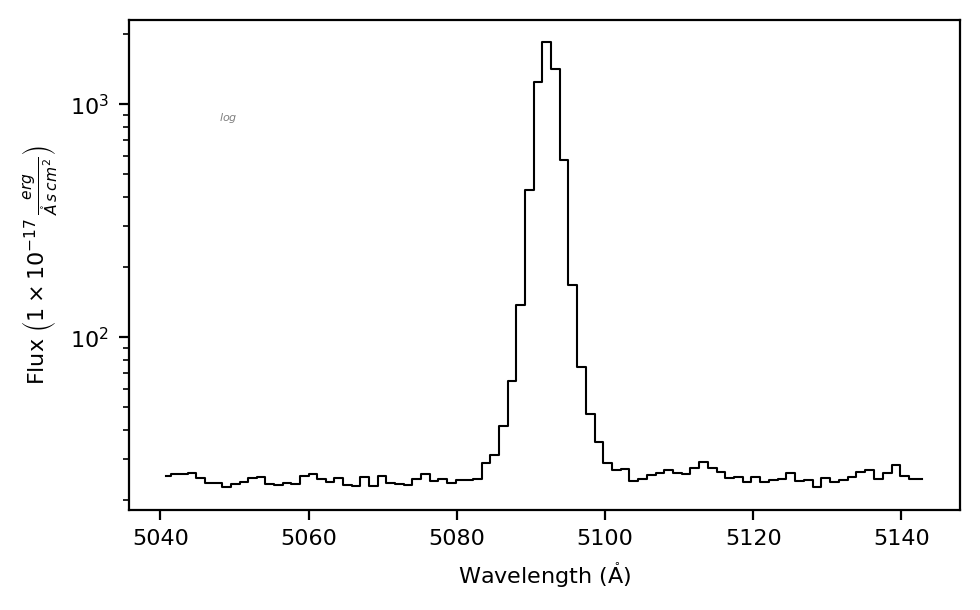

In [3]:
spec.plot.bands('H1_4861A')

Finally, you can a the line using the $\tt{.band}$ function in the  $\tt{.fit}$ module  

In [4]:

spec.fit.bands('H1_4861A')

If we run  $\tt{plot.bands}$ again we can check the profile:

H1_4861A


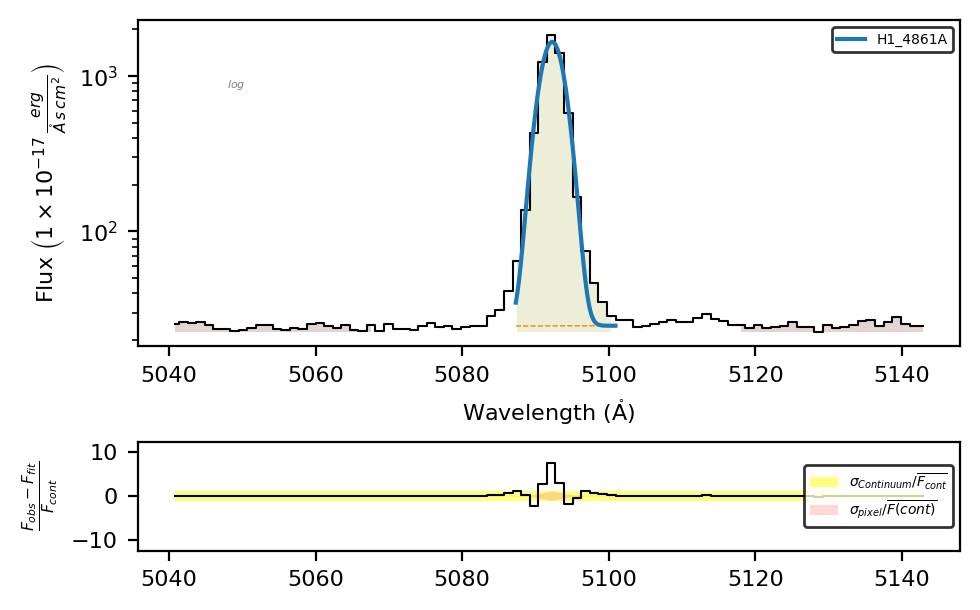

In [5]:
spec.plot.bands()

<div class="alert alert-success" role="alert">

**Remember:** spec.plot.bands() displays the last line in the $\tt{spec.frame}$ if no labeled is provided.

</div>

In [6]:
spec.frame

,wavelength,intg_flux,intg_flux_err,profile_flux,profile_flux_err,eqw,eqw_err,particle,latex_label,group_label,...,v_10,v_90,v_95,v_99,chisqr,redchi,aic,bic,observations,comments
H1_4861A,4861.25,6763.02413,44.085045,6393.26336,256.54406,259.245922,281.821124,H1,$HI4861\mathring{A}$,none,...,NaN,NaN,NaN,NaN,986.415189,17.934822,170.350792,176.532121,no,no


## Takeaways

* The $\mathrm{LiMe}$ $\tt{Spectrum}$, $\tt{Cube}$, and $\tt{Sample}$ observations match} astronomical spectroscopic datasets.
* $\mathrm{LiMe}$ can create observations directly from the **.fits** files of certain instruments or by supplying the unpacked data directly. You can read more about these options [in the *.fits* files guide](../2_guides/0_creating_observations.ipynb).
* Observations provide several functions to measure, plot, and interact with the data. You can find the complete list and their attributes in the [API](https://lime-stable.readthedocs.io/en/latest/introduction/api.html).
